In [1]:
import pandas as pd


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Diabetes%20Prediction%20%5BEND%202%20END%5D/dataset/kaggle_diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns

<Axes: >

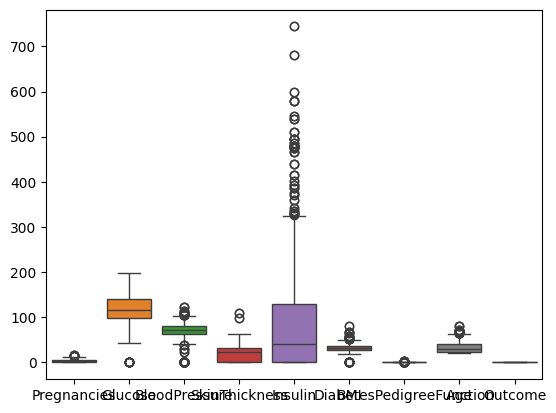

In [7]:
sns.boxplot(df)

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
y=df['Outcome']
x=df.drop('Outcome',axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
lr=LogisticRegression()
dr=DecisionTreeClassifier()

In [15]:
lr.fit(x_train,y_train)
dr.fit(x_train,y_train)

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [16]:
print(lr.score(x_test,y_test),lr.score(x_train,y_train))
print(dr.score(x_test,y_test),dr.score(x_train,y_train))

0.794 0.768
0.966 1.0


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(lr,x_test,y_test,cv=5)

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

array([0.74, 0.83, 0.8 , 0.78, 0.81])

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={
    'C': [0.1,1,10,100],                    # regularization parameter
    'penalty':['l2','l1'],           # penality types
    'solver':['liblinear']          # optimization algorithm
}

In [21]:
lr=LogisticRegression(max_iter=5000)

In [22]:
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid, cv=5,scoring='accuracy')

In [23]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [24]:
best_params=grid_search.best_params_
print("Best_parameters:",best_params)

Best_parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [25]:
lr=LogisticRegression(max_iter=1000,C=10,penalty='l1',solver='liblinear')

In [26]:
lr.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

In [27]:
lr.score(x_train,y_train)     

0.768

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [29]:
df['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       320
           1       0.78      0.59      0.68       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.79       500



In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,lr.predict(x_test))

array([[290,  30],
       [ 73, 107]])

In [34]:
confusion_matrix(y_test,lr.predict(x_test))

array([[290,  30],
       [ 73, 107]])

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [36]:
print(accuracy_score(y_test,lr.predict(x_test)))
print(precision_score(y_test,lr.predict(x_test)))
print(recall_score(y_test,lr.predict(x_test)))
print(f1_score(y_test,lr.predict(x_test)))

0.794
0.781021897810219
0.5944444444444444
0.6750788643533123


In [37]:
import pickle

In [38]:
with open('model.pickle','wb') as model_file:
    pickle.dump(lr,model_file)

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [40]:
df.Glucose.max()

np.int64(199)

In [41]:
df.BMI.max()

np.float64(80.6)

In [42]:
df.DiabetesPedigreeFunction.value_counts()

DiabetesPedigreeFunction
0.258    16
0.207    15
0.268    13
0.261    13
0.520    13
         ..
0.720     2
0.322     2
0.320     2
0.493     1
0.107     1
Name: count, Length: 505, dtype: int64